# BASEBALL WINNING ANALYSIS


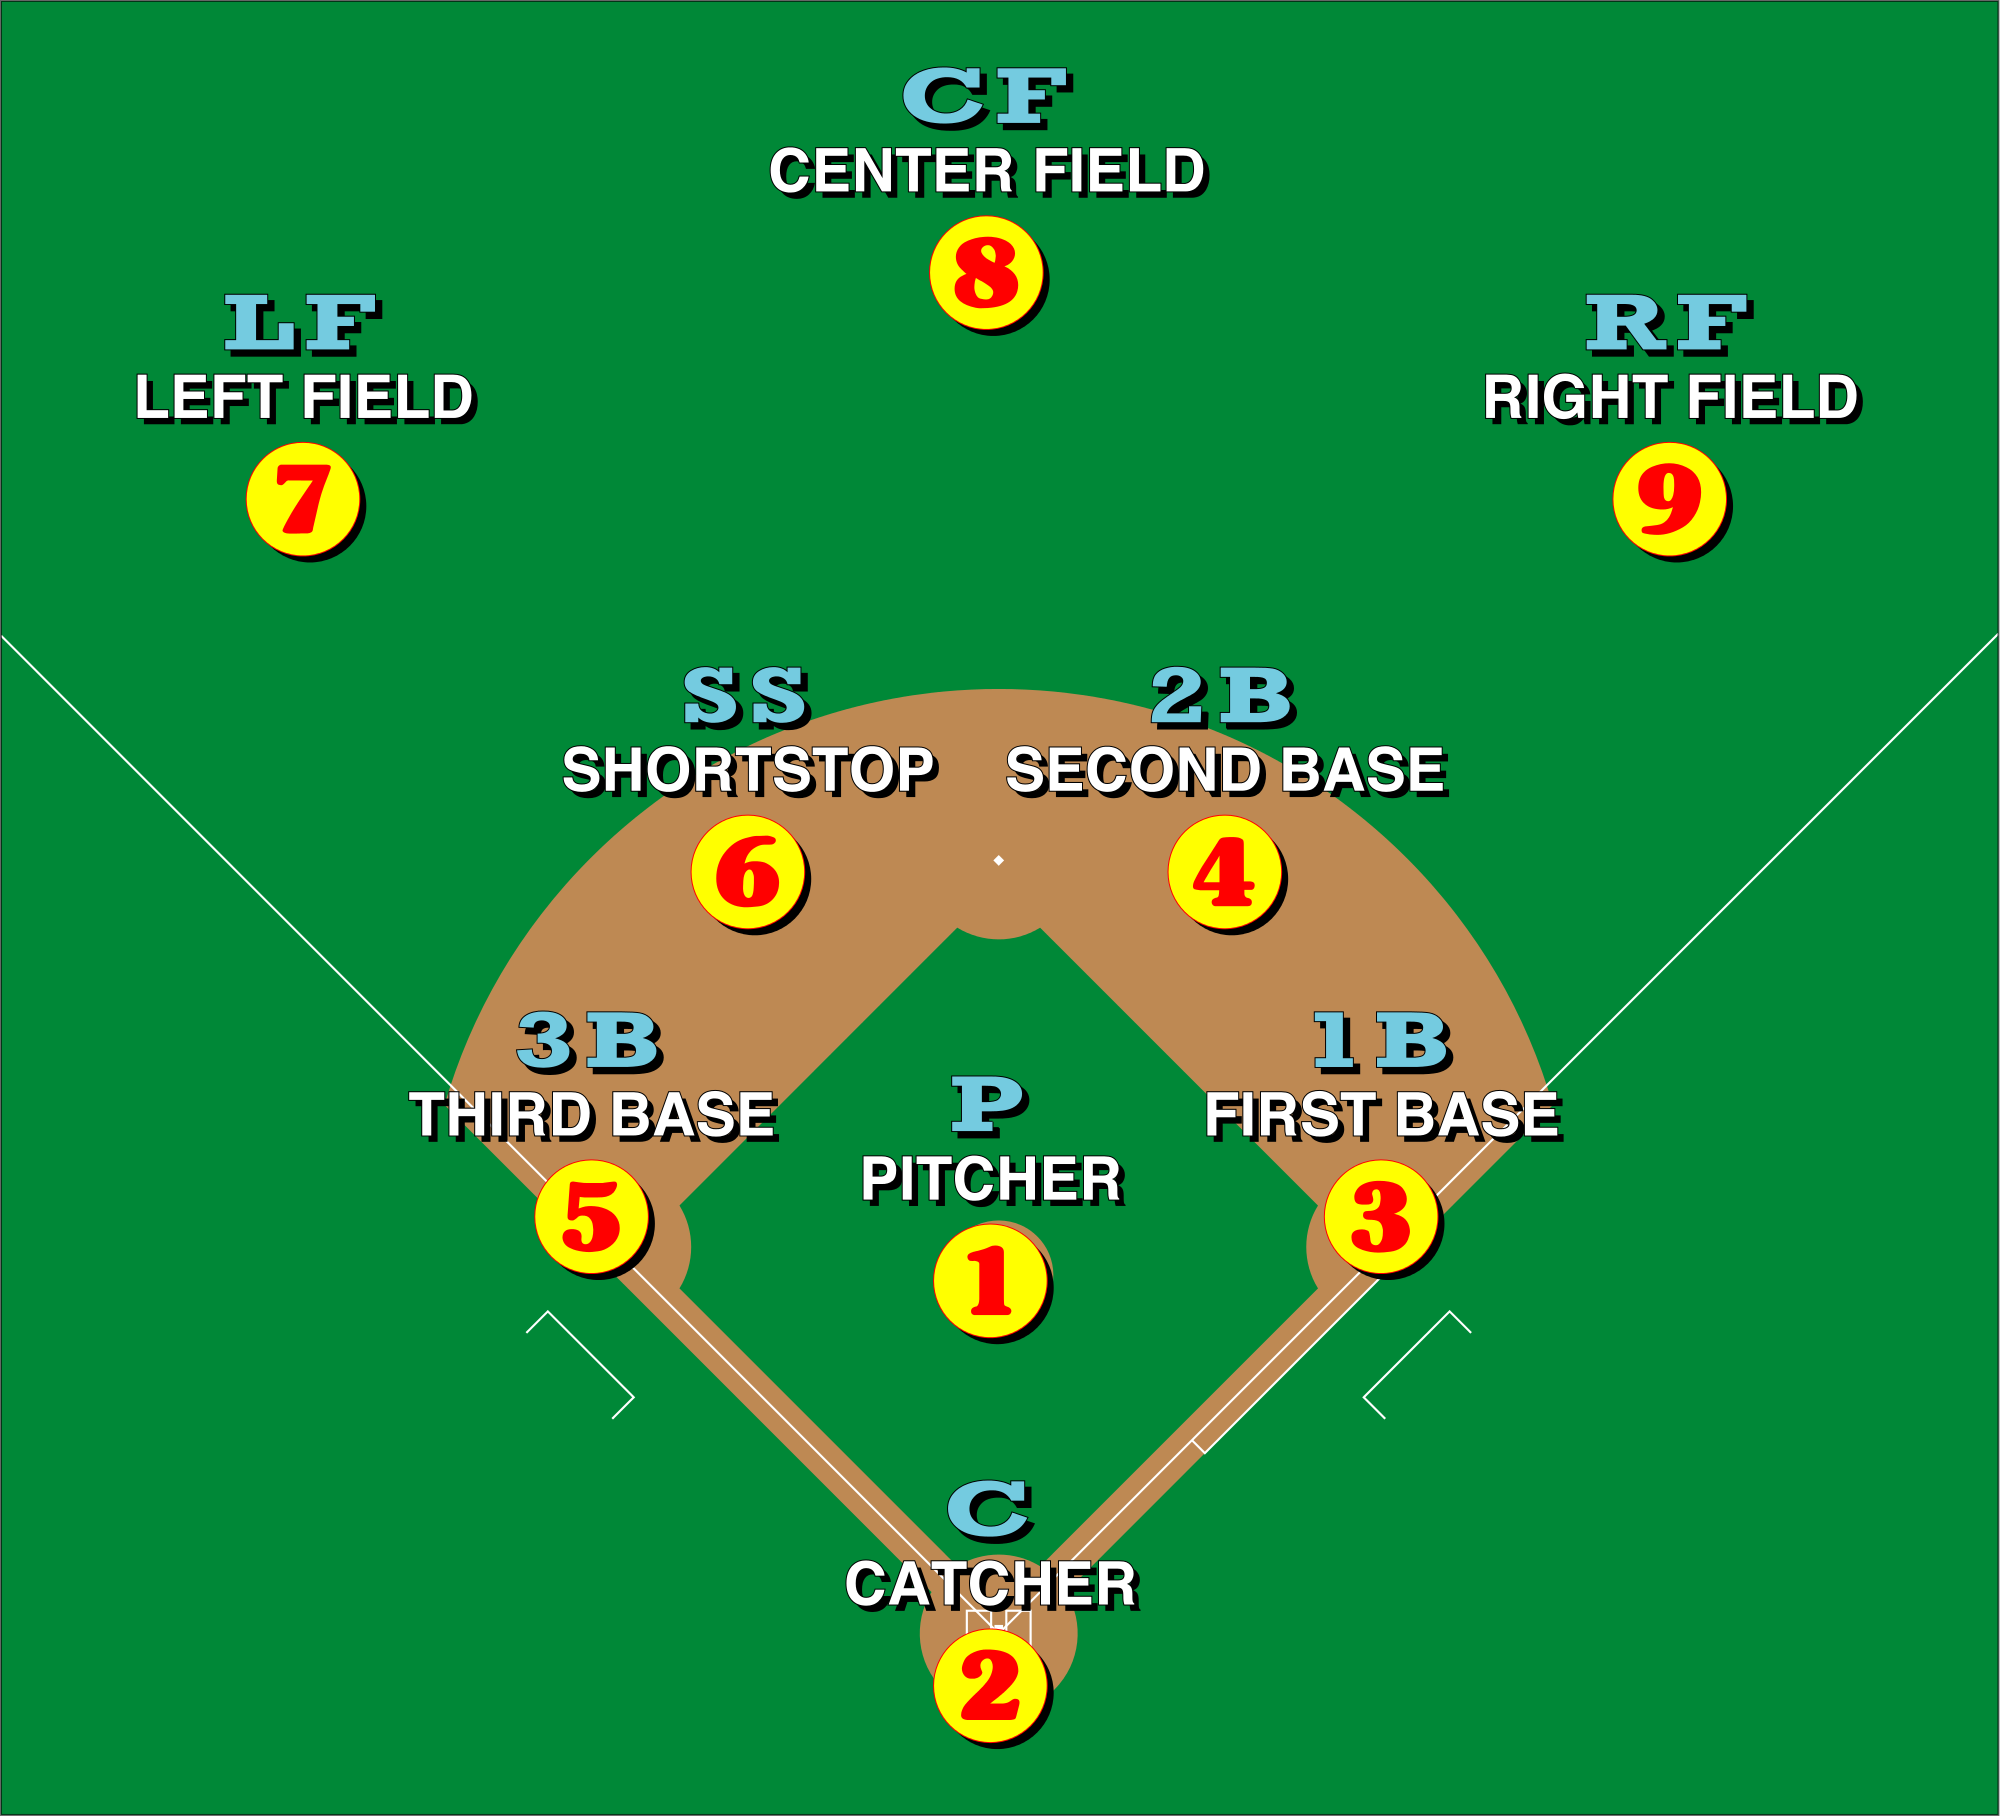

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or 
obstruction

HR – At bats per home run: at bats divided by home runs

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

H (or HA) – Hits allowed: total hits allowed

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

R – Runs scored: number of times a player crosses home plate

RA – Run average: number of runs allowed times nine divided by innings pitched

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

CG – Complete game: number of games where player was the only pitcher for their team

W + S – Wins in relief + saves.

DETAIL OF COLUMNS...
WILL BE USING INITIALS AS GIVEN 

In [1]:
!pip install xgboost

In [2]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
#CALLING CSV FILE INTO DATAFRAME
df=pd.read_csv("baseball.csv")

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EDA

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.shape

(30, 17)

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

ALL NUMERIC DATA PRESENT 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

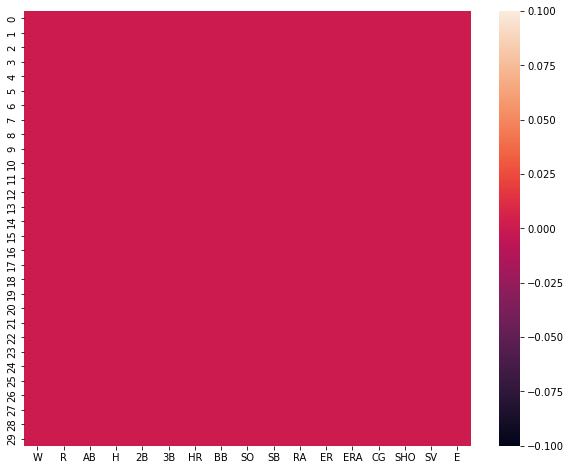

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())


NO NULL PRESENT

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


SOME OF THE COLUMN DATA SEEM TO BE ALMOST NORMALLY DISTRIBUTED OR LESS SKEWNESS PRESENT
WILL HAVE A LOOK IN MAP FORMAT FOR BETTER UNDERSTANDING 

<AxesSubplot:>

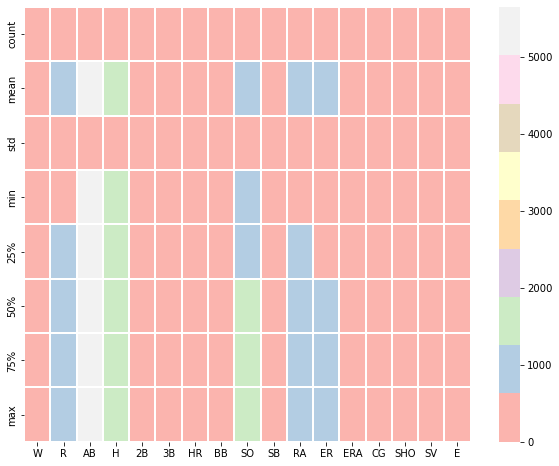

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(),cmap='Pastel1',linewidths=.2)



std for all columns is same in range i.e. less deviated or not.

H,R,AB,RA,ER are normally distributed as mean median and mode has same band




# DATA VISUALIZATION

<AxesSubplot:xlabel='HR', ylabel='Count'>

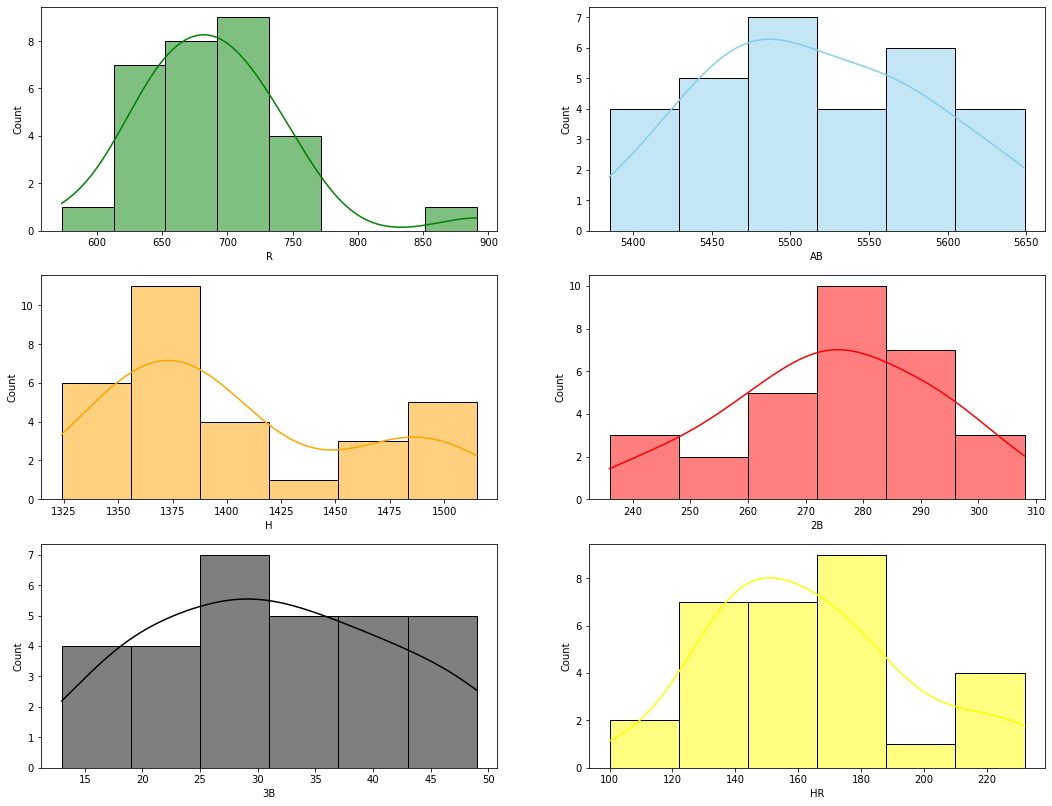

In [13]:

fig, axs = plt.subplots(3, 2, figsize=(18, 14))

sns.histplot(data=df, x="R", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="AB", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="H", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="2B", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=df, x="3B", kde=True, ax=axs[2, 0], color='black')
sns.histplot(data=df, x="HR", kde=True, ax=axs[2, 1], color='yellow')




RUNS(R),HITS(H) AND ATBATS PER HOME RUN(HR) ARE HAVING A LITTLE SKEWNESS PRESENT 

REST ALL SEEM TO BE NORMALLY DISTRIBUTED

<AxesSubplot:xlabel='ERA', ylabel='Count'>

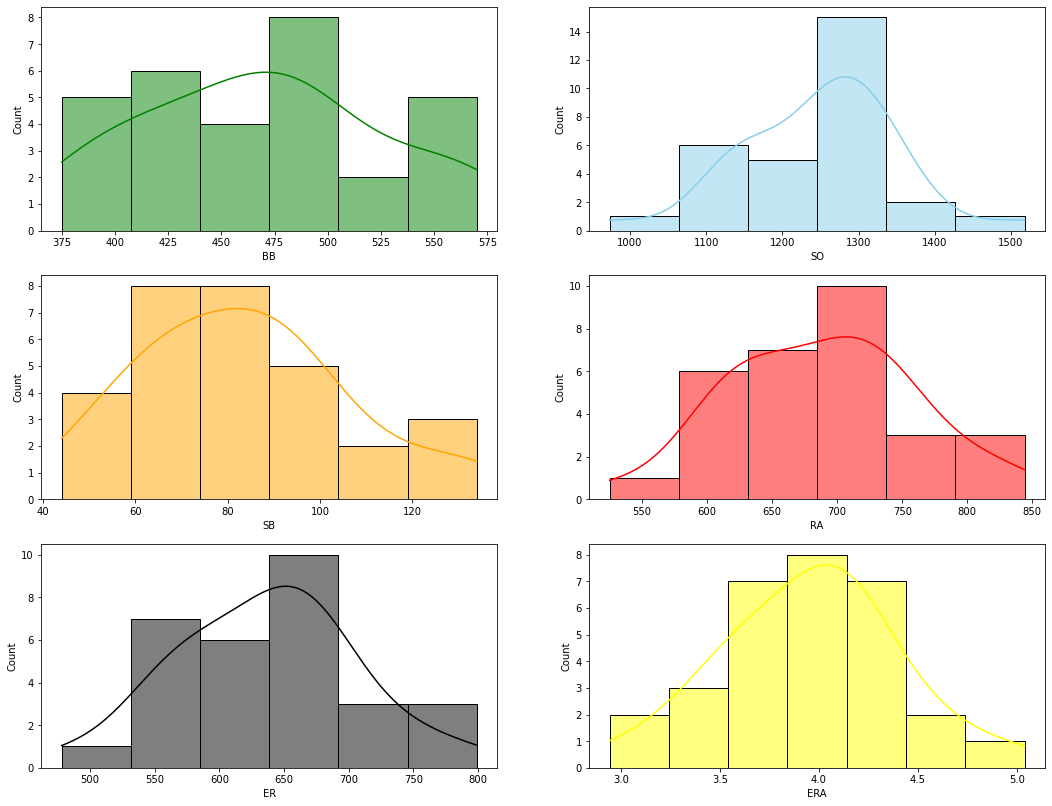

In [14]:

fig, axs = plt.subplots(3, 2, figsize=(18, 14))


sns.histplot(data=df, x="BB", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="SO", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="SB", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="RA", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=df, x="ER", kde=True, ax=axs[2, 0], color='black')
sns.histplot(data=df, x="ERA", kde=True, ax=axs[2, 1], color='yellow')


ER AND ERA ARE ALMOST SIMILAR VALUES

HIGHER SO WILL LEAD TO LESS ER

<AxesSubplot:xlabel='SO', ylabel='ER'>

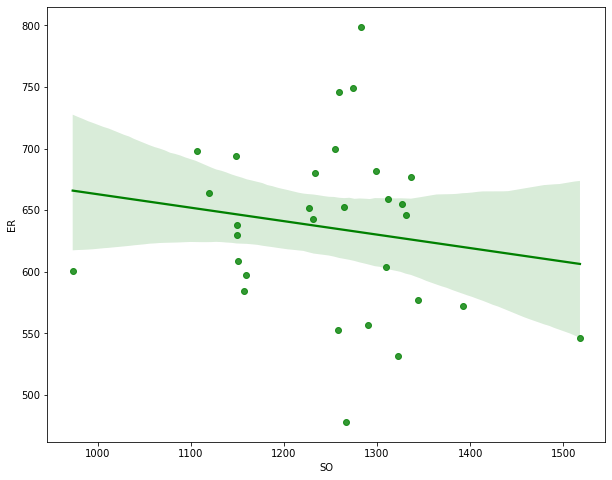

In [15]:
plt.figure(figsize=(10,8))

sns.regplot(data=df,x='SO',y='ER',color='green')

HIGHER SO LEADS TO LESS ER

<AxesSubplot:xlabel='W', ylabel='Count'>

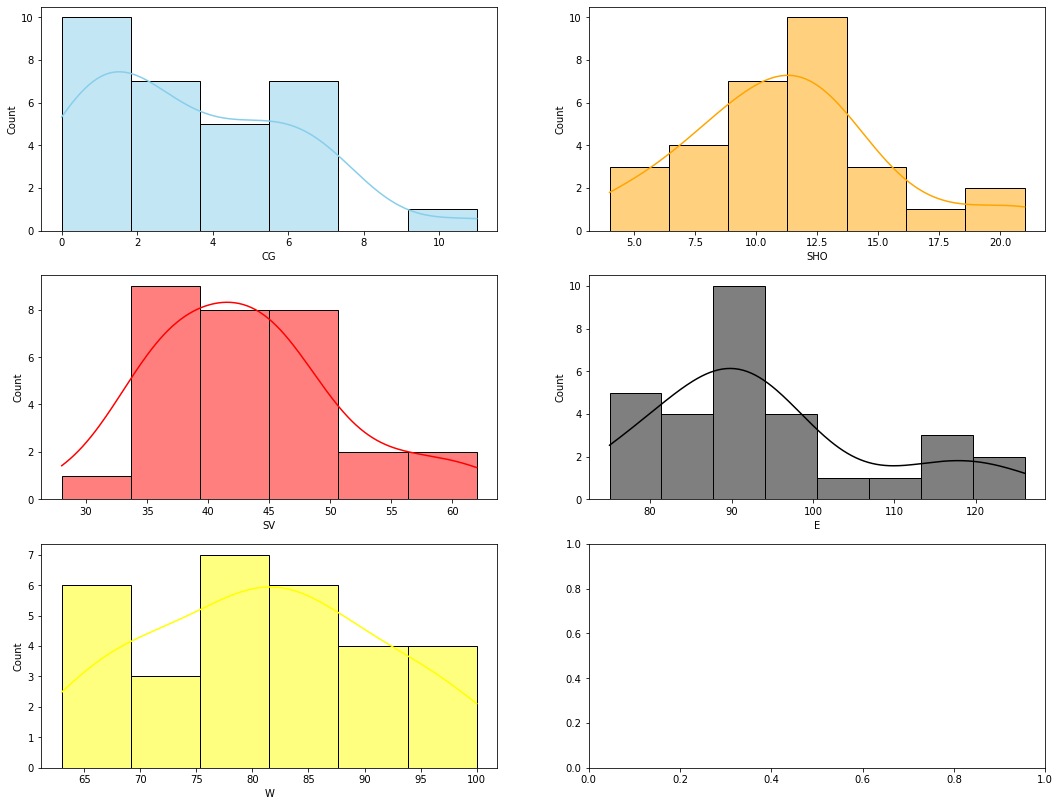

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(18, 14))


sns.histplot(data=df, x="CG", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=df, x="SHO", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df, x="SV", kde=True, ax=axs[1, 0], color='red')
sns.histplot(data=df, x="E", kde=True, ax=axs[1, 1], color='black')
sns.histplot(data=df, x="W", kde=True, ax=axs[2, 0], color='yellow')

STARTING NUMBER OF STRIKING PLAYER MOSTLY TENDS TOWARDS WINNING

E ERRORS IS POSITIELY RELATED TO W

<AxesSubplot:xlabel='E', ylabel='W'>

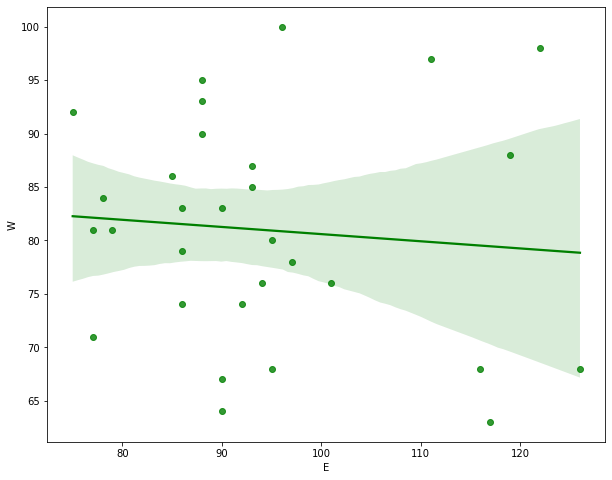

In [17]:
plt.figure(figsize=(10,8))

sns.regplot(data=df,x='E',y='W',color='green')

MORE ERRORS WILL LEAD TO LOSE GAME

<AxesSubplot:xlabel='W', ylabel='R'>

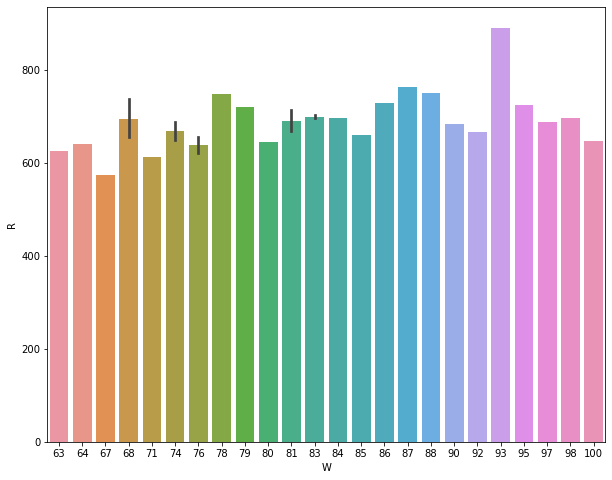

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='W',y='R')


IT IS OBVIOUS MOSTLY MORE RUNS WILL LEAD TO WINNINGS

<AxesSubplot:xlabel='3B', ylabel='SB'>

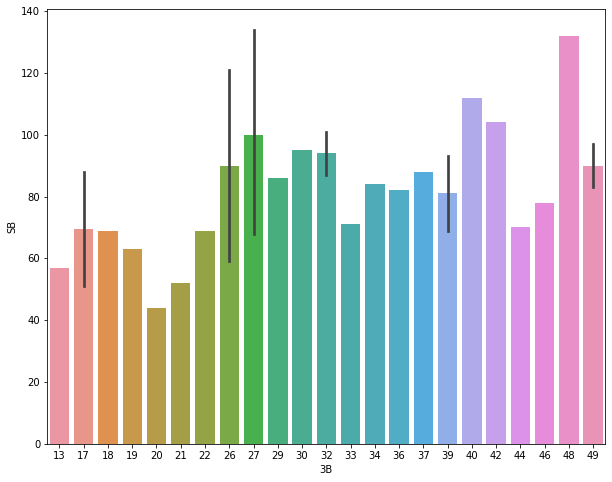

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='3B',y='SB')


NUMBER OF STOLEN BASSES ARE HIGH AS THIRD BASE RUN INCREASES

LEADS TO MORE WIN

<AxesSubplot:xlabel='ER', ylabel='ERA'>

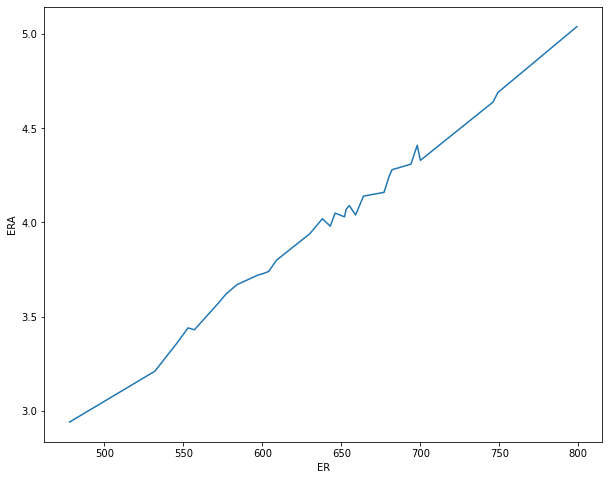

In [20]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='ER',y='ERA')

ER AND ERA ARE ALMOST SIMILAR DATAS 

AS ER INCREASES EERA ALSO INCREASES

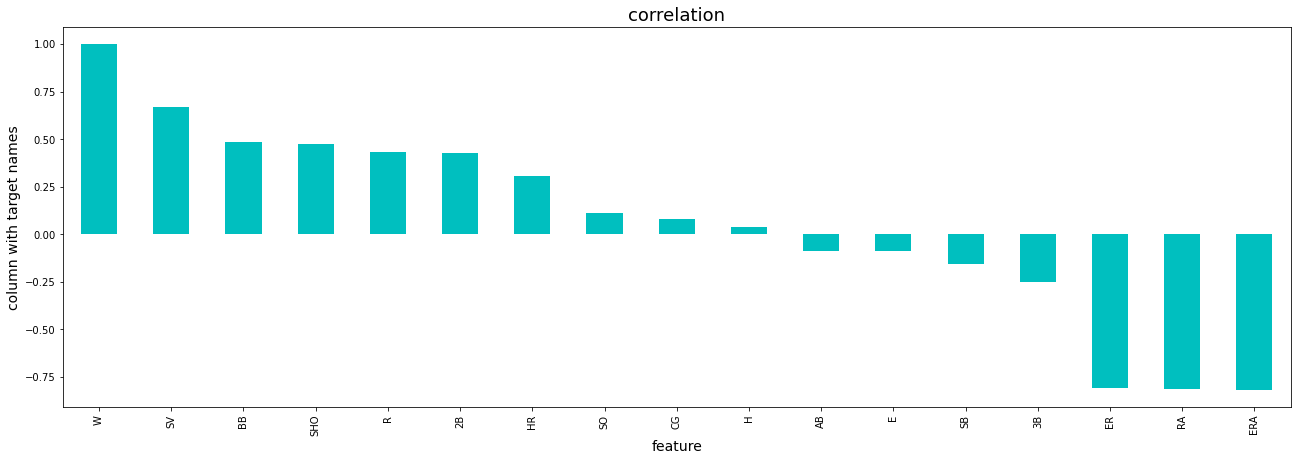

In [21]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

E,SB,3B,ER,ERA,RA,AB ARE NEGATIVELY CORRELATED


In [22]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

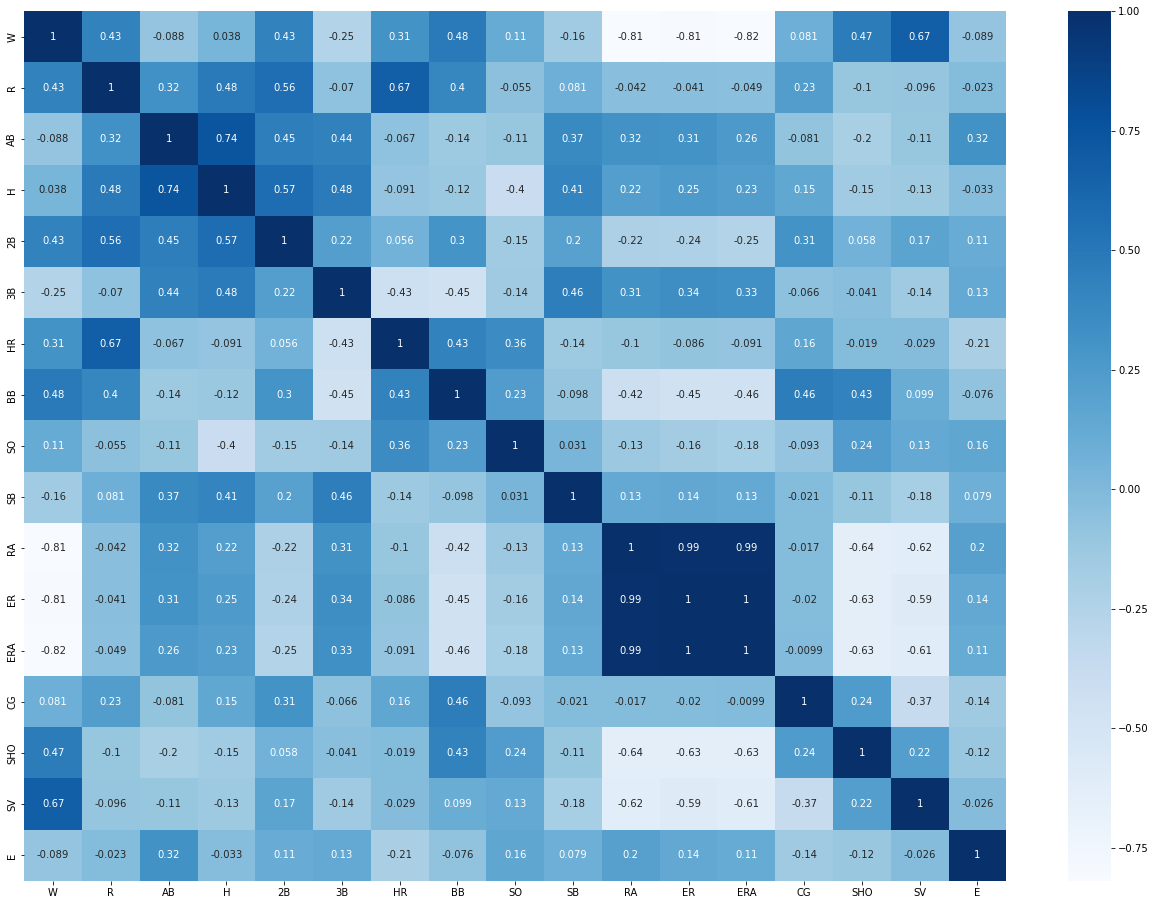

In [23]:
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

ERA AND ER ARE SIMILAR CAN DROP ONE

SO IS ALSO NOT MUCH CORRELATED TO ANY CAN DROP IT

<AxesSubplot:xlabel='AB', ylabel='E'>

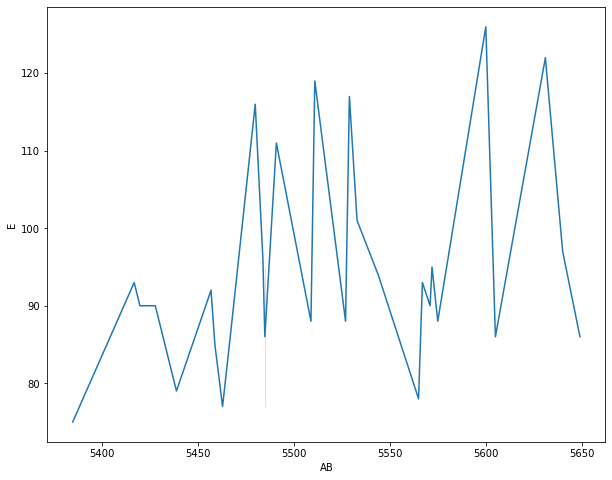

In [24]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='AB',y='E',)

AB IS SO UNPRIDICTABLE BUT SOMETIMES IT CAN B SEEN BECAUSE OF ERROR E

<AxesSubplot:xlabel='E', ylabel='Density'>

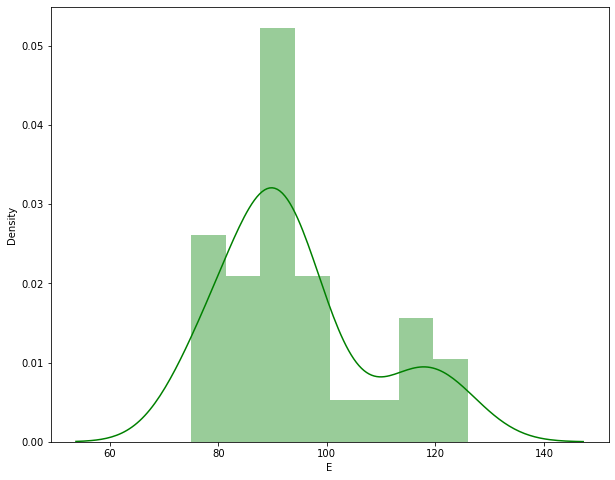

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(df['E'],color='green')

HERE ERRORS(E) HAS BEEN IN RANGE OF 60 TO 140 

AND IS ALMOST NORMALLY DISTRIBUTED

ALTHOUGH MODE IS HIGH COMPARED TO MEDIAN AND MEAN

In [26]:
df.drop(['E'],axis=1,inplace=True)
df.drop(['ER'],axis=1,inplace=True)

df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35


### OUTLIERS CHECK

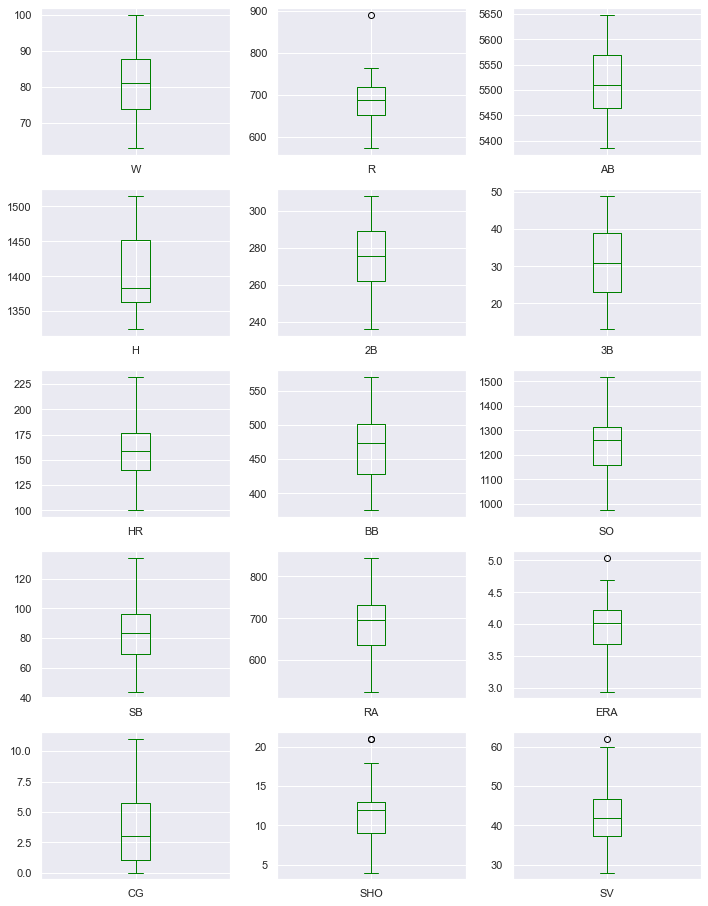

In [27]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,15),color = 'green')
plt.tight_layout()

R,ERA,SV,SHO AND E ARE HAVING SOME OUTLIERS SO REMOVING IT
# APPLYING ZSCORE FOR REMOVING OUTLIERS

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.506955,0.539806,0.814629,1.671607
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.254598,0.539806,0.172800,0.249879
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.641347,2.772641,0.320914,0.654856
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.053010,1.300442,0.567771,0.784104
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.531318,1.300442,0.172800,1.042600
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.350165,1.300442,0.320914,1.171848
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.165003,0.171757,1.802057,0.637623
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.209800,1.275906,0.320914,0.008617
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.484557,0.907856,0.172800,2.188598
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.792164,0.171757,0.320914,0.396360


In [29]:
threshold=3
print(np.where(z>3))

(array([5]), array([1]))


In [30]:
df1=df[(z<3).all(axis=1)]
x=df1
x.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35


## Feature and labeling of dataframe

In [31]:

# splittig the target variables
y = df['W']
x = df.drop(['W'], axis = 1)

# lets check teh shape of the new var
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (30, 14)
Shape of y : (30,)


## CHECKING SKEWNESS

In [32]:
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
dtype: float64

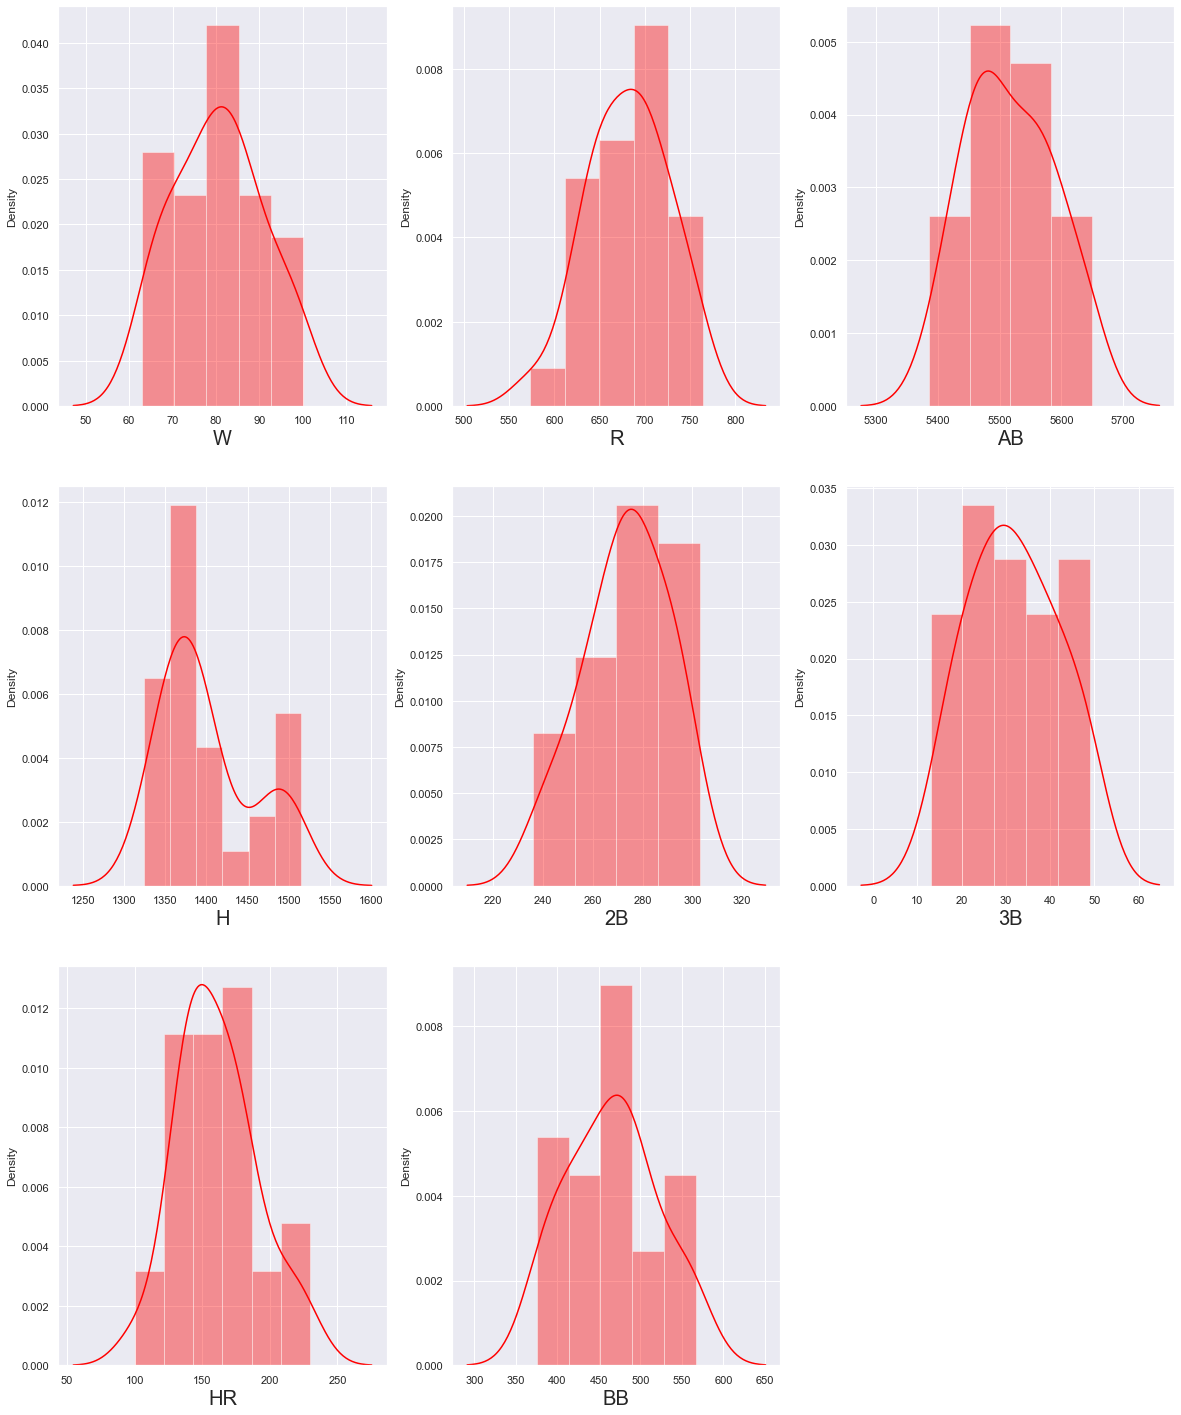

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

ALMOST ALL DATA ARE NORMALLY DISTRIBUTED

EXCEPT WITH SOME CASES OF RUNS(R) HAS A LITTLE SKEWNESS

HITS(H) HAS SOME DEVAITION



# Removing skewness


In [34]:
from sklearn.preprocessing import power_transform

df1=power_transform(x,method='yeo-johnson')
df1

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.50089346, -0.35984364, -0.78957937,  1.546378  ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.26180619, -0.35984364,  0.25177537,  0.36044386],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.63645949,  1.99351257, -0.24539345, -0.6075936 ],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.06080381,  1.22010317, -0.51075929, -0.76445333],
       [ 0.        ,  0.        ,  0.        ,  0.79218291,  1.61644394,
        -0.3298501 , -0.20677062,  0.08545863,  0.07962852,  1.6032282 ,
         1.52095856,  1.22

## SCALING DATA

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50695519, -0.5398062 , -0.81462859,  1.67160651],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.25459752, -0.5398062 ,  0.1728    ,  0.24987932],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.64134684,  2.77264091, -0.32091429, -0.65485616],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.05301004,  1.3004422 , -0.56777144, -0.78410408],
       [ 0.01327008,  1.28073815,  1.98408098,  0.80189192,  1.72234737,
        -0.40377019, -0.25136033,  0.10586628, -0.02228984,  1.61880269,
         1.53131824,  1.30

# Model Building

In [36]:
# importing all the required libraries of models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [37]:
# creating instances of models
models = [('lr',LinearRegression()),('ridge',Ridge()),('lasso',Lasso()),('rfr',RandomForestRegressor()),
         ('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet())]

In [38]:
#function to return best score of individual models
def model_selection(md,model):
    best_score=0
    for i in range(201):
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
        
        md = model
        md.fit(x_train,y_train)
        b_score=md.score(x_test,y_test)
        pred_md = md.predict(x_test)
        b_score
        if b_score>best_score:
            best_score=b_score
            random_state=i
    print("Best Score for model ",model," is = {} For Random state = {}".format(best_score*100,random_state))
    
  

In [39]:
for i,j in models:
    model_selection(i,j)

Best Score for model  LinearRegression()  is = 91.62686847971125 For Random state = 190
Best Score for model  Ridge()  is = 95.55457452384682 For Random state = 39
Best Score for model  Lasso()  is = 95.5734449300357 For Random state = 167
Best Score for model  RandomForestRegressor()  is = 86.43788461538462 For Random state = 163
Best Score for model  BaggingRegressor()  is = 83.01639344262296 For Random state = 97
Best Score for model  GradientBoostingRegressor()  is = 75.45397678399954 For Random state = 136
Best Score for model  ElasticNet()  is = 95.11429460160048 For Random state = 163


# splitting dataframe 
train test split

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=167)


# MODEL SELECTION

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)


print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.9608019539942533
r2 score:  0.7129946705640227
Mean absolute error: 5.294662201804026
Mean squared error: 41.61222949254468
Root mean squared error: 6.450754180136202


In [42]:

from sklearn.tree import DecisionTreeRegressor

dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtc_pred=dtc.predict(x_test)


print('score : ',dtc.score(x_train,y_train))
print('r2 score : ',r2_score(y_test,dtc_pred))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,dtc_pred))
print('Mean squared error:', mean_squared_error(y_test,dtc_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,dtc_pred)))

score :  1.0
r2 score :  0.4352009536784741
Mean absolute error: 8.333333333333334
Mean squared error: 81.88888888888889
Root mean squared error: 9.049247973665485


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Score: ',rf.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrf))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))

Score:  0.9137140021459227
r2 score:  0.6713163828337876
Mean absolute error: 5.348888888888889
Mean squared error: 47.655066666666656
Root mean squared error: 6.90326492803707


In [44]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  0.19744157775246407
r2 score:  0.11831425454257971
Mean absolute error: 9.808118386963104
Mean squared error: 127.83354808212276
Root mean squared error: 11.306349900923939


In [45]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predls))
print('Mean squared error:', mean_squared_error(y_test,predls))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predls)))

Score:  0.8226904154274783
r2 score:  0.9557344493003571
Mean absolute error: 1.9375798847482868
Mean squared error: 6.417958363167971
Root mean squared error: 2.533368974935939


In [46]:
# Regularization

from sklearn.linear_model import Ridge

rd= Ridge()
rd.fit(x_train,y_train)
predrd= rd.predict(x_test)
print('Score: ',rd.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrd))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))

Score:  0.9118037097376126
r2 score:  0.9386101307754289
Mean absolute error: 2.288427824936347
Mean squared error: 8.90077313794276
Root mean squared error: 2.983416353434894


# Hyper parameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

parrf={'criterion' : ["mse", "mae"], 'max_features':['auto','sqrt','log2']}
gcvrf= GridSearchCV(rf,parrf) 
gcvrf.fit(x_train,y_train)
gcvrf.best_params_

{'criterion': 'mae', 'max_features': 'log2'}

In [48]:
parsvr={'kernel' : ["linear", "poly",'rbf'], 'gamma':['auto','scale']}
gcvsvr= GridSearchCV(svr,parsvr) 
gcvsvr.fit(x_train,y_train)
gcvsvr.best_params_

{'gamma': 'auto', 'kernel': 'linear'}

In [49]:
parls={'alpha' : [0.0001,0.001,0.01,0.1,1]}
gcvls= GridSearchCV(ls,parls) 
gcvls.fit(x_train,y_train)
gcvls.best_params_

{'alpha': 1}

# Now using the above parameters which are found to be best

In [50]:
mod1= RandomForestRegressor(criterion='mae', max_features='sqrt', random_state=163)
mod1.fit(x_train,y_train)
pred1=mod1.predict(x_test)
print('Score: ',mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred1))

Score:  0.9207179184549356
r2 score:  0.6254364611716621


In [51]:
mod2= Lasso(alpha=1, random_state=167)
mod2.fit(x_train,y_train)
pred2=mod2.predict(x_test)
print('Score: ',mod2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred2))

Score:  0.8226904154274783
r2 score:  0.9557344493003571


In [52]:
mod3= SVR(kernel='linear', gamma='auto')
mod3.fit(x_train,y_train)
pred3=mod3.predict(x_test)
print('Score: ',mod3.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred3))

Score:  0.8459145099016157
r2 score:  0.8484984661772945


### model_2 is dong well i.e. ridge regression

In [53]:
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred2))
print('Mean squared error:', mean_squared_error(y_test,pred2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred2)))

Mean absolute error: 1.9375798847482868
Mean squared error: 6.417958363167971
Root mean squared error: 2.533368974935939


# Cross Validation



In [54]:
# LINEAR REGRESSION


test_accuracy= r2_score(y_test,predlr)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is -555.5694889942422 and Accuracy score is 71.29946705640226
At cross fold 3 the Cross Val score is 31.57076728251657 and Accuracy score is 71.29946705640226
At cross fold 4 the Cross Val score is 79.30541859299008 and Accuracy score is 71.29946705640226
At cross fold 5 the Cross Val score is 17.220283302093513 and Accuracy score is 71.29946705640226
At cross fold 6 the Cross Val score is 51.51146741653263 and Accuracy score is 71.29946705640226
At cross fold 7 the Cross Val score is 58.849548523059724 and Accuracy score is 71.29946705640226
At cross fold 8 the Cross Val score is 54.97795653927091 and Accuracy score is 71.29946705640226
At cross fold 9 the Cross Val score is -138.66711111117274 and Accuracy score is 71.29946705640226


In [55]:
# DESICION TREE

test_accuracy= r2_score(y_test,dtc_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is -27.827159285604917 and Accuracy score is 43.52009536784741
At cross fold 3 the Cross Val score is -25.88147803588096 and Accuracy score is 43.52009536784741
At cross fold 4 the Cross Val score is -6.651215141791106 and Accuracy score is 43.52009536784741
At cross fold 5 the Cross Val score is -217.0494485685589 and Accuracy score is 43.52009536784741
At cross fold 6 the Cross Val score is -47.67653156561728 and Accuracy score is 43.52009536784741
At cross fold 7 the Cross Val score is -133.2086920344867 and Accuracy score is 43.52009536784741
At cross fold 8 the Cross Val score is -177.74466718592467 and Accuracy score is 43.52009536784741
At cross fold 9 the Cross Val score is -1168.735069386846 and Accuracy score is 43.52009536784741


In [56]:
# RANDOM FOREST REGRESSOR
test_accuracy= r2_score(y_test,predrf)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is -17.914067832647625 and Accuracy score is 67.13163828337876
At cross fold 3 the Cross Val score is 41.780452053186565 and Accuracy score is 67.13163828337876
At cross fold 4 the Cross Val score is 36.39364091973644 and Accuracy score is 67.13163828337876
At cross fold 5 the Cross Val score is -50.723360432968725 and Accuracy score is 67.13163828337876
At cross fold 6 the Cross Val score is 25.376408116869147 and Accuracy score is 67.13163828337876
At cross fold 7 the Cross Val score is 3.0479788101466405 and Accuracy score is 67.13163828337876
At cross fold 8 the Cross Val score is -23.36260619644779 and Accuracy score is 67.13163828337876
At cross fold 9 the Cross Val score is -1301.3794466815723 and Accuracy score is 67.13163828337876


In [57]:
# SUPPORT VECTOR REGRESSOR
test_accuracy= r2_score(y_test,preds)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is -6.125138401928654 and Accuracy score is 11.831425454257971
At cross fold 3 the Cross Val score is -5.094599754406745 and Accuracy score is 11.831425454257971
At cross fold 4 the Cross Val score is -10.860770068644579 and Accuracy score is 11.831425454257971
At cross fold 5 the Cross Val score is -35.36117139257655 and Accuracy score is 11.831425454257971
At cross fold 6 the Cross Val score is -1.0055760081153775 and Accuracy score is 11.831425454257971
At cross fold 7 the Cross Val score is -26.72946959117743 and Accuracy score is 11.831425454257971
At cross fold 8 the Cross Val score is -31.351478884477736 and Accuracy score is 11.831425454257971
At cross fold 9 the Cross Val score is -2281.980773056728 and Accuracy score is 11.831425454257971


In [ ]:
#Lasso REGRESSOR
test_accuracy= r2_score(y_test,predls)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ls,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
#RIDGE REGRESSOR
test_accuracy= r2_score(y_test,predrd)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rd,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

##### LASSO REGRESSION IS PERFORMING BETTER
CV SCORE--80.1

R2 SCORE-95.5

HENCE BEST MODEL



### so the best model with less difference between r2 score and cv score is LASSO REGRESSOR

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= predls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

## Best fit Line

# Saving Best Model


In [ ]:
import pickle
filename='Baseball_win.pkl'
pickle.dump(ls,open(filename,'wb'))

In [ ]:
import numpy as np
a=np.array(y_test)
predicted= np.array(ls.predict(x_test))
df_check= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_check